# Fault Classification in Electrical power system transmission lines
The transmission line is the most crucial part of the power system, its role is to transmit electric power from the source area to the distribution network. The faults on electrical power system transmission lines are supposed to be first detected and classified correctly and should be cleared in the least possible time. The application of pattern recognition technology could help discriminate against faulty and healthy electrical power systems. It also enables us to differentiate among three phases of a three-phase power system experiencing a fault.

### Content 
The power system consists of 4 generators of 11 × 10^3 V, each pair located at each end of the transmission line. Transformers are present in between to simulate and study the various faults at the midpoint of the transmission line. Data simulate the circuit under normal conditions as well as under various fault conditions. The measures of Line Voltages and Line Currents of the three phases (A,B,C) are collected at the output side of the power system. 
Six type of fault conditions may occur:
- No Fault
- Fault between Phase A and ground 
- Fault between Phase A and Phase B
- Fault between Phases A,B and ground
- Fault between all three phases
- Three phase symmetrical fault

More details available: https://www.kaggle.com/datasets/esathyaprakash/electrical-fault-detection-and-classification?select=classData.csv



In [1]:
from functions_sup import *

In [2]:
# import data
ef = pd.read_csv('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/classData.csv',sep=',')

The six types of fault previously showed are represented in the dataset with 4 dummy variables,three phase and the ground that can experience the fault. Starting from these 4 binary variables we create two variables used as target in the models:
- Target: (machine status) a binary variable that indicates whether or not a fault occur.
- Failure Type: (multiclass) variables that maps the six possible states of the transmission line.   

In [3]:
ef=pre_process_EF(ef)

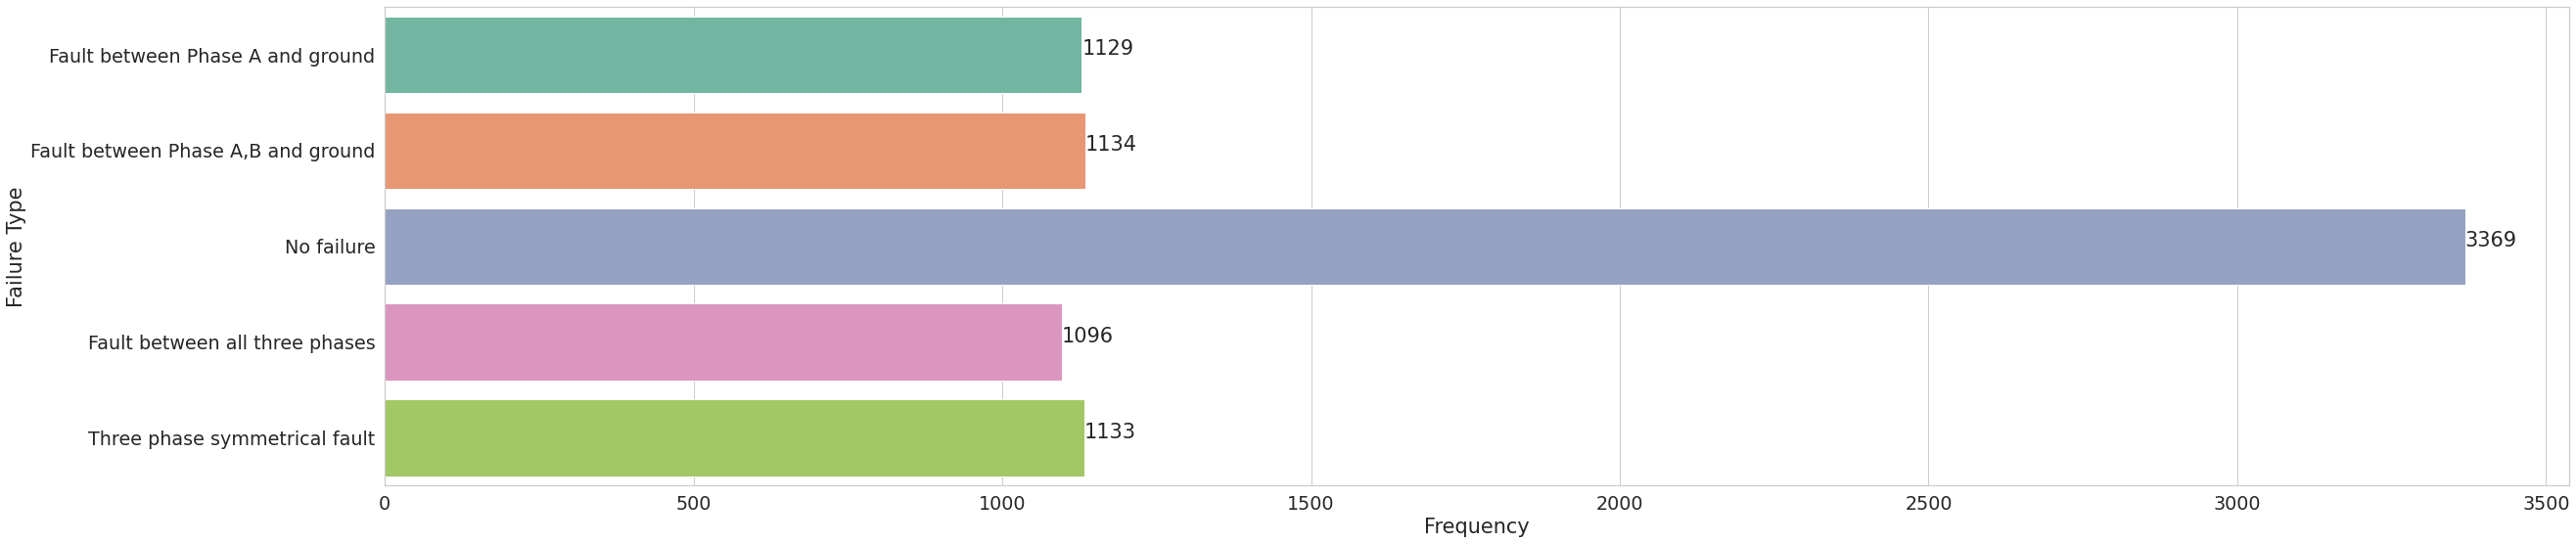

In [7]:
plt.figure(figsize=(40,9))
sns.set_theme(font_scale=1.74,style="whitegrid")
pl = sns.countplot(y=ef["Failure Type"],palette="Set2")
pl.set(xlabel="Frequency")
for p in pl.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        pl.annotate(percentage, (x, y))
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/unbalancedEF.png') 

The majority of points are classified as No failure. Concerning the Failure Type classification the dataset is imbalanced while regarding the machine status classification the dataset is balanced when the 5 types of faults are considered together. 

In [4]:
le = LabelEncoder()
# categories follow the alphabetic order
# (0):Fault between Phase A and ground
# (1): Fault between Phase A,B and ground
# (2): Fault between all three phases
# (3): No failure 
# (4): Three phase symmetrical fault
ef['Failure Type'] = le.fit_transform(ef.loc[:,["Failure Type"]].values)

/home/nico_ronzo/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


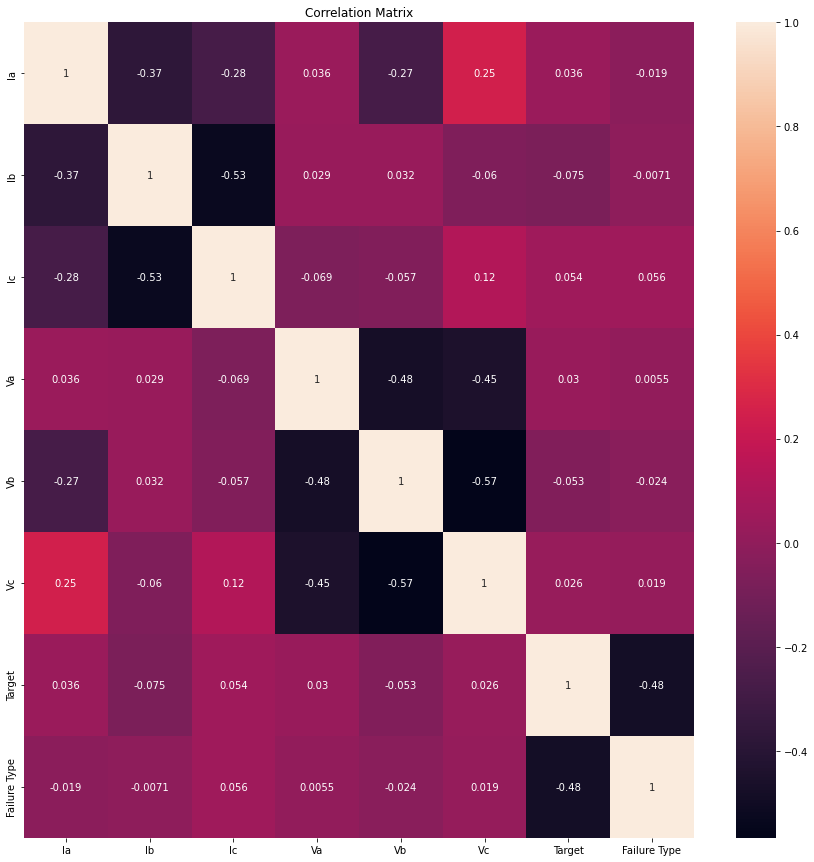

In [6]:
plt.figure(figsize=(15,15))
pl = sns.heatmap(ef.corr(), annot=True)
pl.set_title("Correlation Matrix")
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/correlationEF.png') 

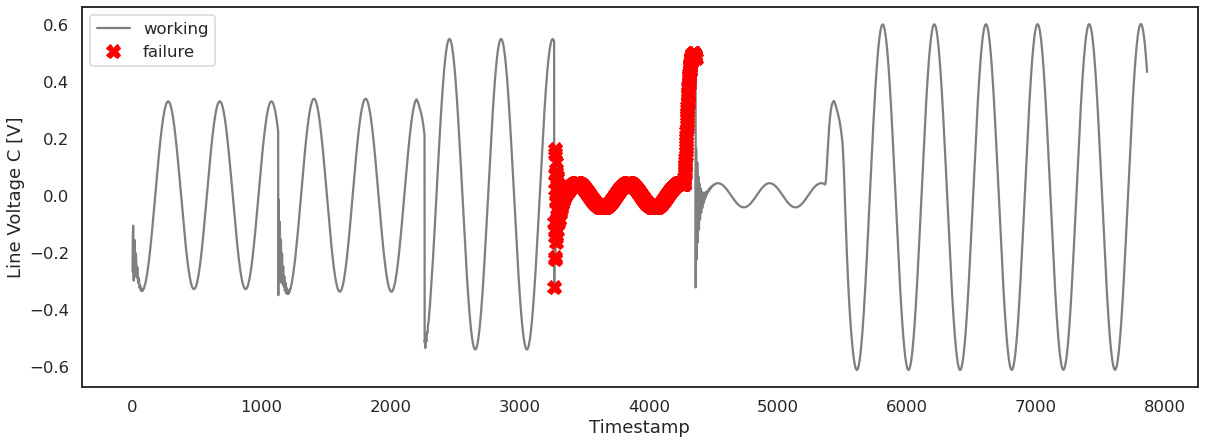

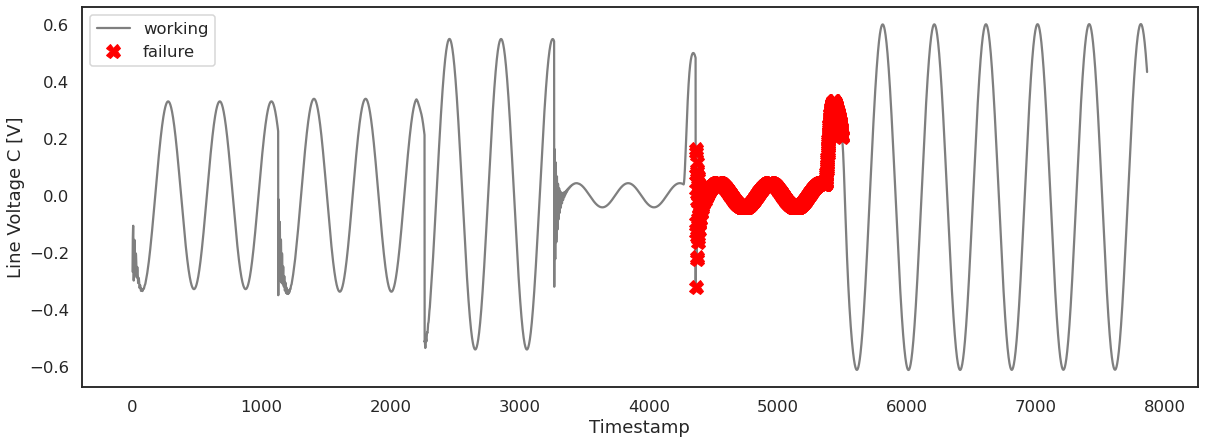

In [9]:
TF=ef[ef['Failure Type']==2]
sns.set_theme(style="white")
sns.set_context('talk')
_ = plt.figure(figsize=(20,7))
_ = plt.plot(ef["Vc"], color='black', label='working',alpha=0.5)
_ = plt.plot(TF["Vc"], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.ylabel('Line Voltage C [V]')
_ = plt.xlabel('Timestamp')
_ =plt.legend()
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/faultbetweenallthreephasesEF.png')
TF=ef[ef['Failure Type']==4]
sns.set_context('talk')
_ = plt.figure(figsize=(20,7))
_ = plt.plot(ef["Vc"], color='black', label='working',alpha=0.5)
_ = plt.plot(TF["Vc"], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.ylabel('Line Voltage C [V]')
_ = plt.xlabel('Timestamp')
_ =plt.legend()
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/threephasesymmetricalfaultEF.png')


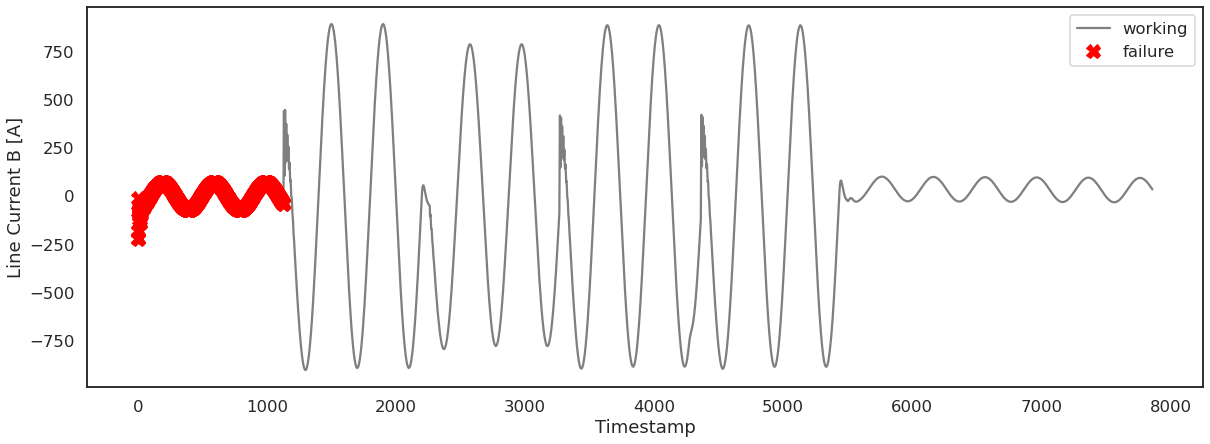

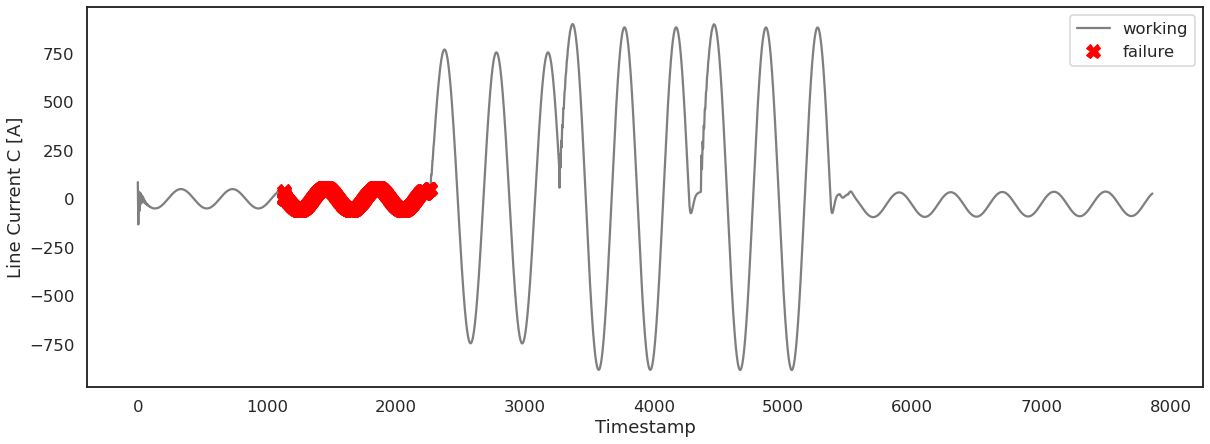

In [11]:
TF=ef[ef['Failure Type']==0]
sns.set_context('talk')
_ = plt.figure(figsize=(20,7))
_ = plt.plot(ef["Ib"], color='black', label='working',alpha=0.5)
_ = plt.plot(TF["Ib"], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.ylabel('Line Current B [A]')
_ = plt.xlabel('Timestamp')
_ =plt.legend()
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/faultbetweenphaseaandgroundEF.png')
TF=ef[ef['Failure Type']==1]
sns.set_context('talk')
_ = plt.figure(figsize=(20,7))
_ = plt.plot(ef["Ic"], color='black', label='working',alpha=0.5)
_ = plt.plot(TF["Ic"], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.ylabel('Line Current C [A]')
_ = plt.xlabel('Timestamp')
_ =plt.legend()
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/faultbetweenphaseabandgroundEF.png')

From the graphical assessments the different type of failures seem present in temporal order. Three phase symmetrical fault follows fault between all three phases. Moreover Fault between Phase A,B and ground follows Fault between Phase A and ground. 

In [5]:
# split the data train and test 
split=split_training_testing(ef,0.33)

### Gradient boost classifier

In [6]:
# gradient boost classifier 
params_gb=grid_gbm(split[2],split[4],'micro')

|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... | subsample |
-------------------------------------------------------------------------------------
|  1        |  0.9825   |  0.616    |  3.353    |  0.8872   |  133.8    |  0.8591   |
|  2        |  0.8677   |  0.1577   |  2.18     |  0.884    |  96.71    |  0.8675   |
|  3        |  0.9912   |  0.9908   |  3.902    |  0.8162   |  126.9    |  0.9242   |
|  4        |  0.987    |  0.2815   |  5.73     |  0.8237   |  85.18    |  0.9802   |
|  5        |  1.0      |  0.796    |  8.725    |  0.963    |  149.4    |  0.9155   |
|  6        |  0.9997   |  0.8156   |  5.371    |  0.8055   |  111.8    |  0.8211   |
|  7        |  1.0      |  0.819    |  7.582    |  0.9131   |  99.2     |  0.9997   |
|  8        |  0.9907   |  0.1467   |  6.923    |  0.897    |  108.4    |  0.9456   |
|  9        |  0.9992   |  0.3296   |  5.204    |  0.8638   |  146.3    |  0.9837   |
|  10       |  0.9495   |  0.8157   |  2.273    |  0.9

In [7]:
# predict the class 
classifier = GradientBoostingClassifier(random_state=123, **params_gb)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2], split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [8]:
# performance micro
print(performance_failure_type(split[5],y_pred_test,'micro'))

Test Precision (Failure Type)      :  88.09 %
Test Recall (Failure Type)         :  88.09 %
Test F1-Score (Failure Type) :  88.09 %
Test Balanced Accuracy Score (Failure Type): 82.99 %
()


In [9]:
# Performance Metrics macro
print(performance_failure_type(split[5],y_pred_test,'macro'))

Test Precision (Failure Type)      :  82.98 %
Test Recall (Failure Type)         :  82.99 %
Test F1-Score (Failure Type) :  82.96 %
Test Balanced Accuracy Score (Failure Type): 82.99 %
()


In [10]:
# Performance Metrics machine status
print(performance_machine_status(split[5],y_pred_test))

Test Precision (Machine Status)      :  99.93 %
Test Recall (Machine Status)         :  100.0 %
Test F1-score (Machine Status) :  99.97 %
()


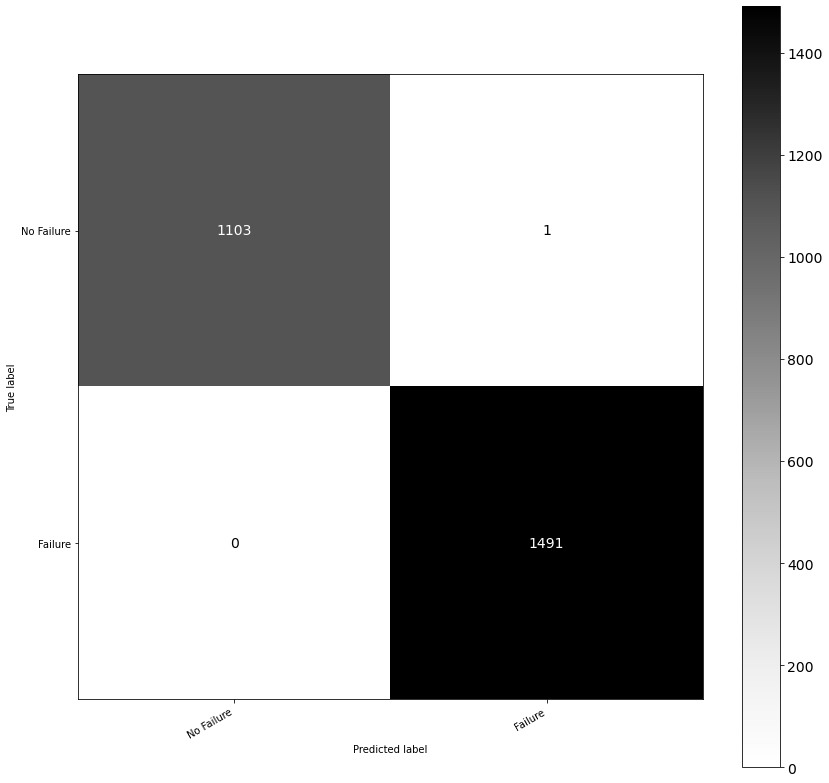

In [11]:
confusion_machine_status(split[5],y_pred_test,)
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/gradientboostmachinestatusEF.png')


The machine status classification is outstanding.

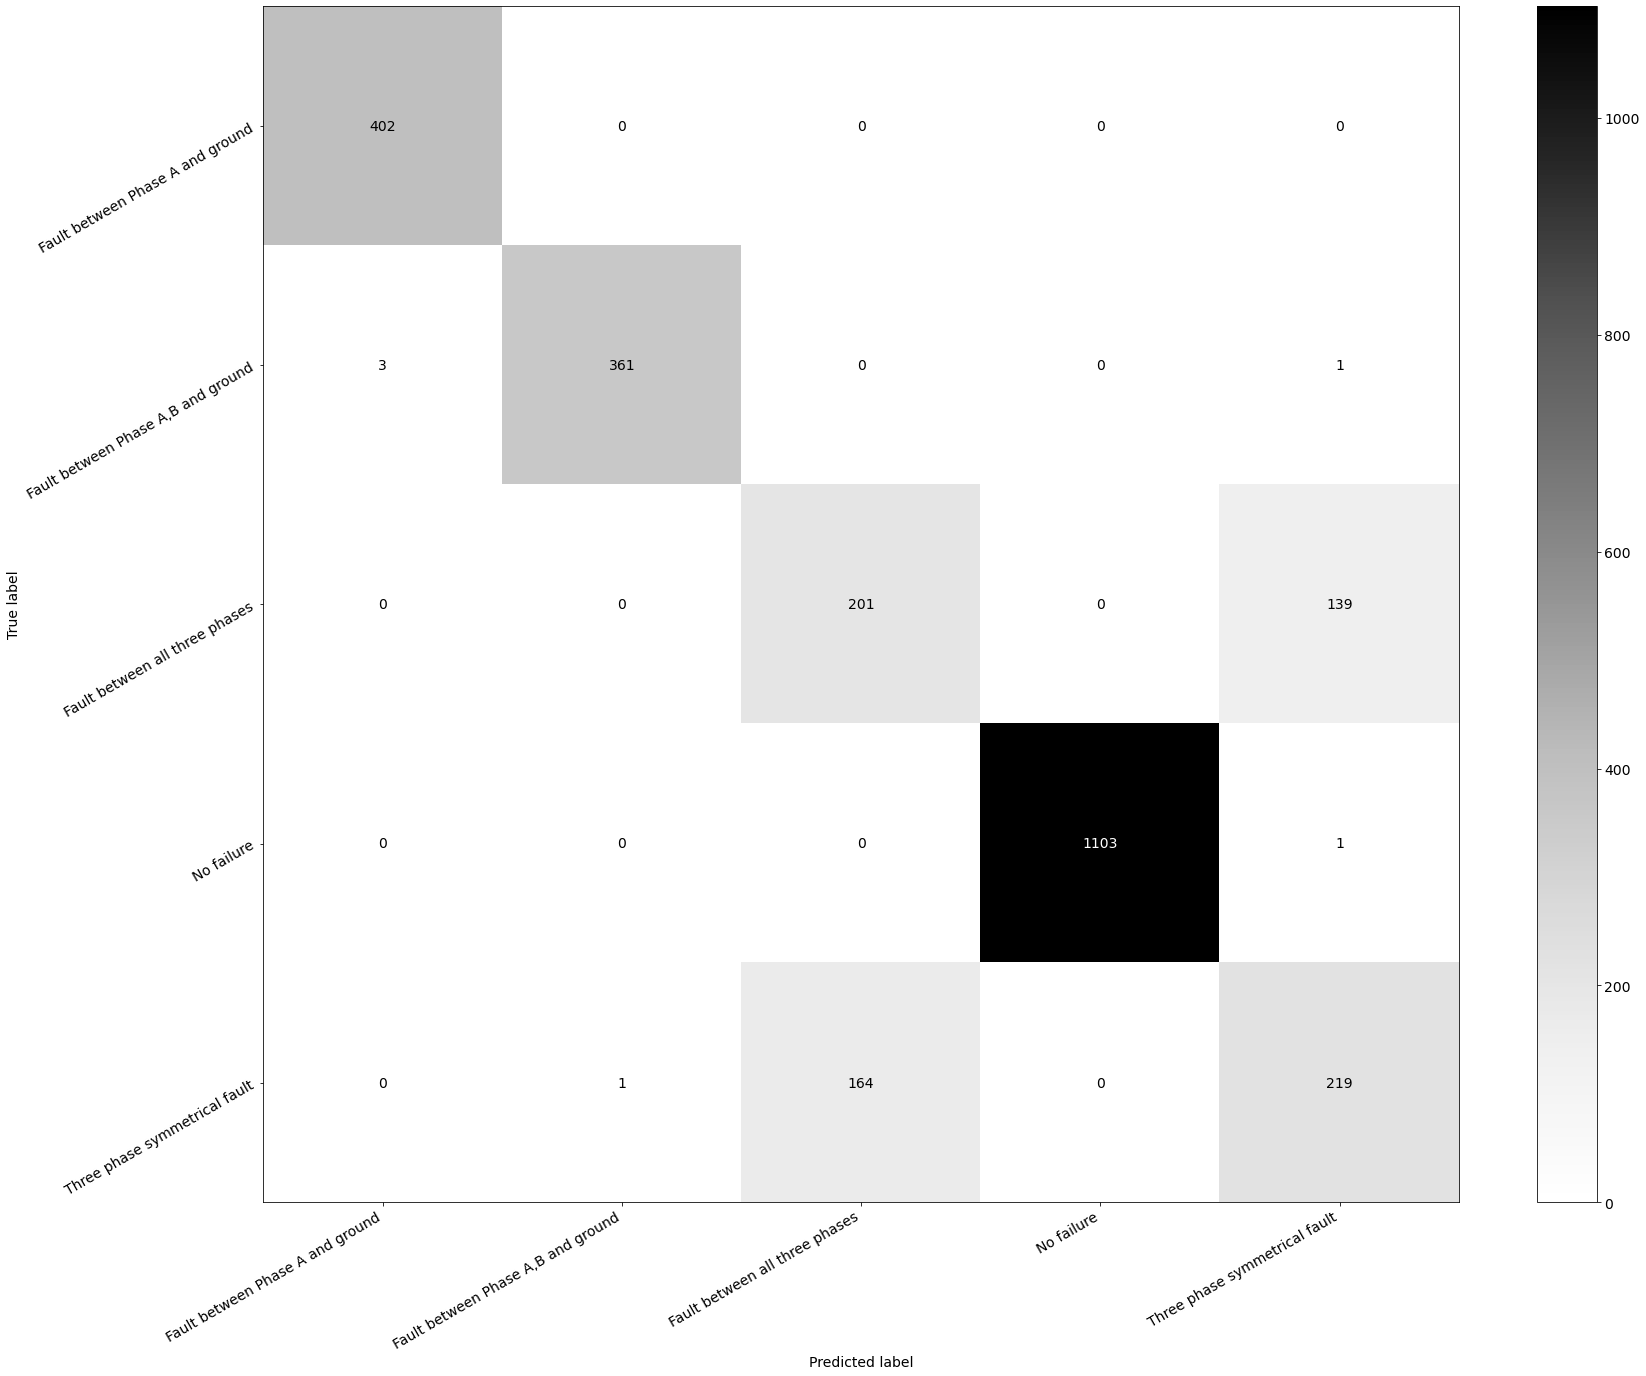

In [12]:
confusion_failure_type(split[5],y_pred_test,['Fault between Phase A and ground','Fault between Phase A,B and ground','Fault between all three phases','No failure','Three phase symmetrical fault'])
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/gradientboostfailuretypeEF.png')


The failure type classification outstands for three categories, while for Fault between all three phases and three phase symmetrical fault the  accuracy of the classification does not exceed 60%. 

### Adaboost classifier

In [13]:
# Ada boost classifier 
params_ab=grid_abm(split[2],split[4],'micro')

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  1        |  0.6628   |  0.616    |  91.83    |
|  2        |  0.6867   |  0.4417   |  133.8    |
|  3        |  0.6912   |  0.3024   |  90.44    |
|  4        |  0.7311   |  0.03225  |  109.4    |
|  5        |  0.7069   |  0.2463   |  103.6    |
|  6        |  0.6117   |  0.9908   |  96.64    |
|  7        |  0.7277   |  0.09038  |  126.9    |
|  8        |  0.6003   |  0.625    |  99.2     |
|  9        |  0.7243   |  0.4716   |  88.29    |
|  10       |  0.7309   |  0.08322  |  143.1    |
|  11       |  0.7226   |  0.796    |  138.8    |
|  12       |  0.7012   |  0.8171   |  149.4    |
|  13       |  0.686    |  0.5815   |  137.0    |
|  14       |  0.7267   |  0.4271   |  81.92    |
|  15       |  0.6498   |  0.4596   |  87.37    |
|  16       |  0.6633   |  0.819    |  128.8    |
|  17       |  0.6622   |  0.5696   |  99.2     |
|  18       |  0.6264   |  0.9985   |  89.66    |


In [14]:
# predict test labels 
classifier = AdaBoostClassifier(random_state=123, **params_ab)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2],split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [15]:
# Performance Metrics micro
print(performance_failure_type(split[5],y_pred_test,'micro'))

Test Precision (Failure Type)      :  81.46 %
Test Recall (Failure Type)         :  81.46 %
Test F1-Score (Failure Type) :  81.46 %
Test Balanced Accuracy Score (Failure Type): 73.85 %
()


In [16]:
# Performance Metrics micro
print(performance_failure_type(split[5],y_pred_test,'macro'))

Test Precision (Failure Type)      :  73.83 %
Test Recall (Failure Type)         :  73.85 %
Test F1-Score (Failure Type) :  73.64 %
Test Balanced Accuracy Score (Failure Type): 73.85 %
()


In [17]:
# Performance Metrics Machine Status
print(performance_machine_status(split[5],y_pred_test))

Test Precision (Machine Status)      :  99.93 %
Test Recall (Machine Status)         :  100.0 %
Test F1-score (Machine Status) :  99.97 %
()


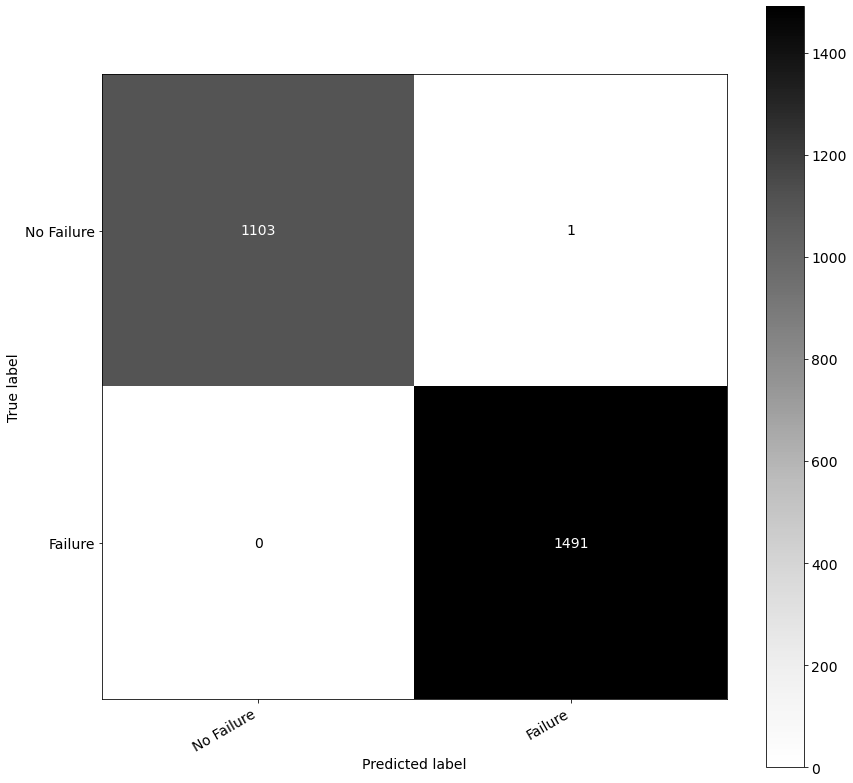

In [18]:
confusion_machine_status(split[5],y_pred_test,)
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/adaboostmachinestatusEF.png')


The machine status classification works well.

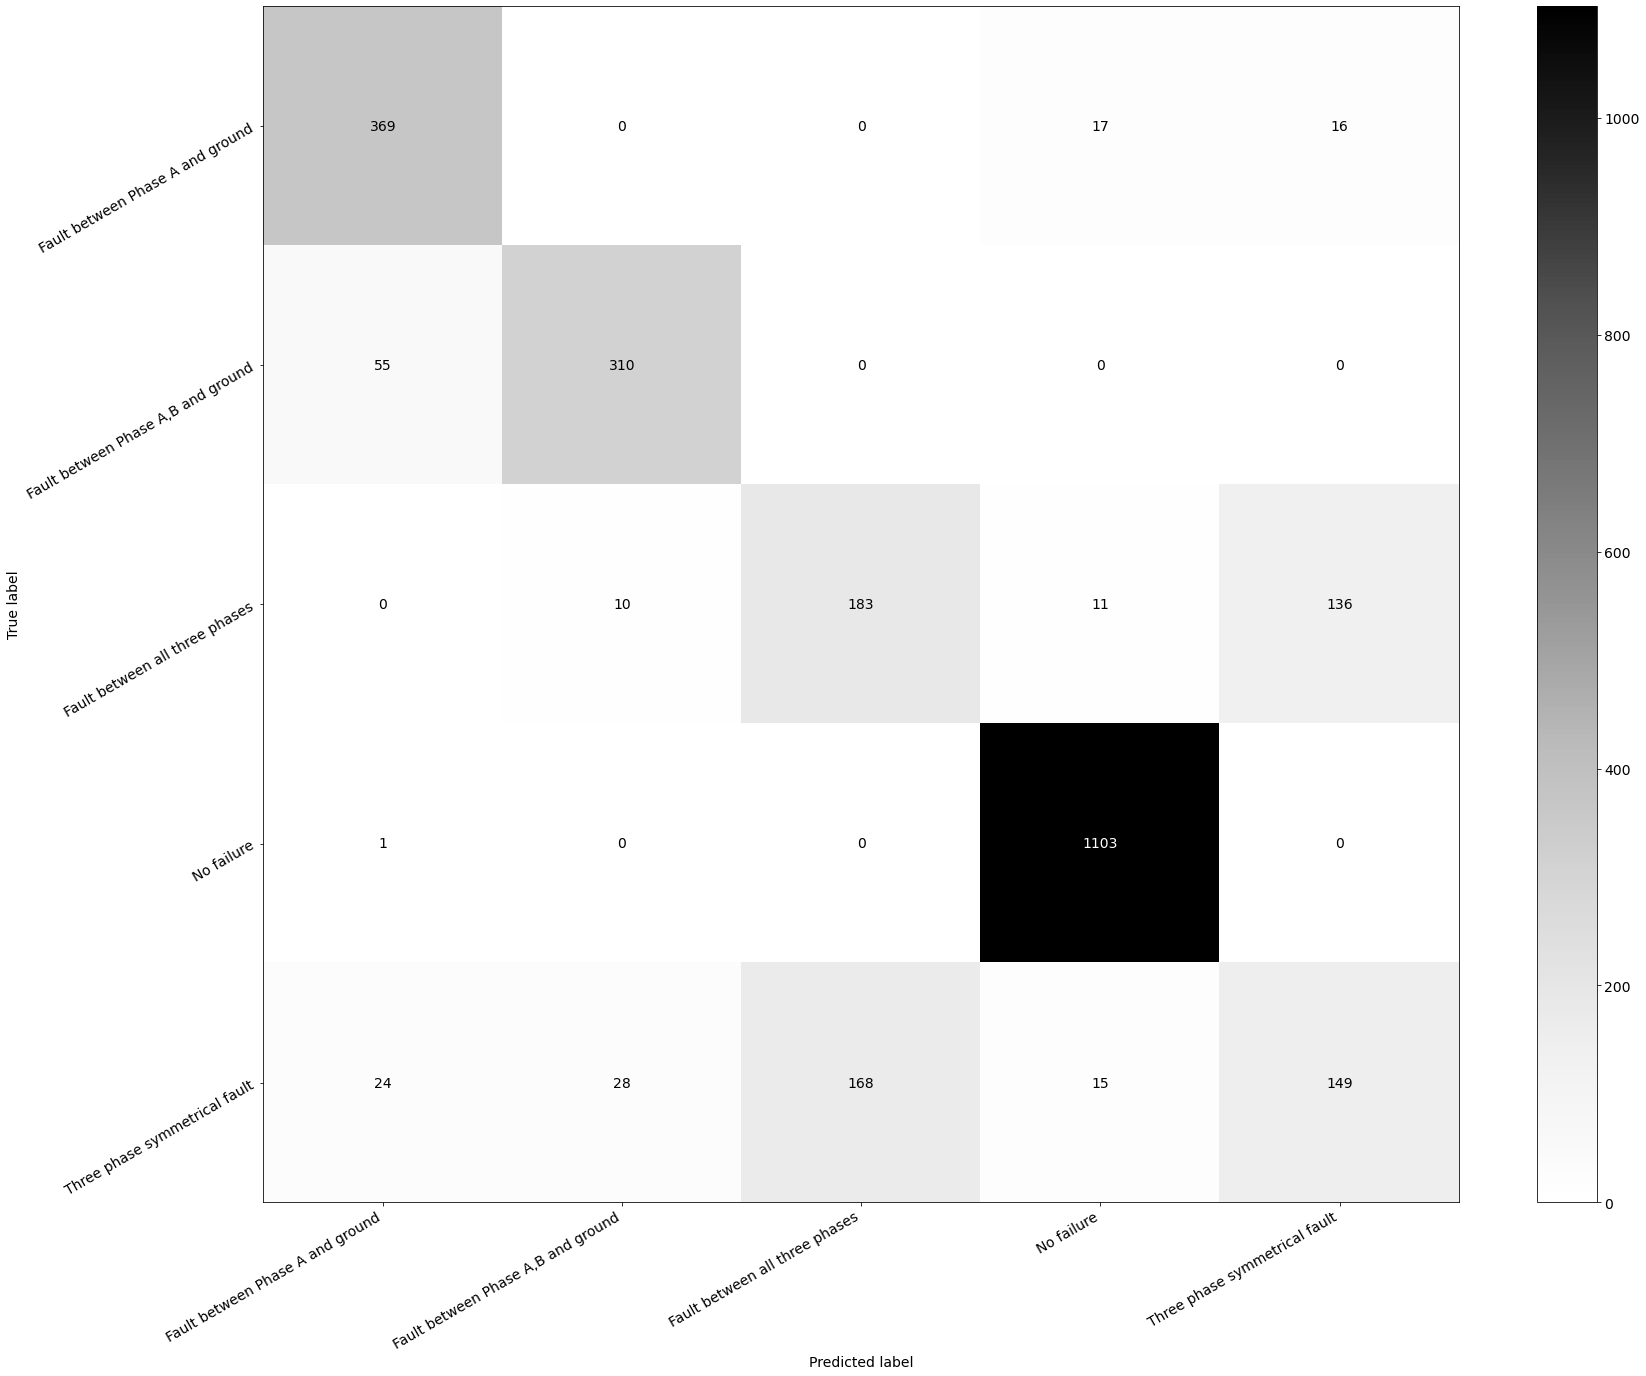

In [19]:
confusion_failure_type(split[5],y_pred_test,['Fault between Phase A and ground','Fault between Phase A,B and ground','Fault between all three phases','No failure','Three phase symmetrical fault'])
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/adaboostfailuretypeEF.png')


The failure type classification works well apart from the Fault between all three phases and three phases symmetrical fault. As in gradient boost classifier misclassification is due to misleading betweeen these two categories. In general the performance of the Adaboost classifier is slightly worst than gradient boost classifier. Despite both of them use an additive structure of tree, the lack of previous tree identified by high-weight data points (Adaboost) behave worst than the residuals of each trees that step-by step reduce the error by identifying the negative gradient and moving in the opposite direction (Gradient Boost).     

### Random forest 

In [20]:
# random forest
params_rf=grid_rfm(split[2],split[4],'micro')

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
|  1        |  0.8295   |  7.285    |  0.8338   |  110.5    |
|  2        |  0.8585   |  8.385    |  0.8591   |  90.44    |
|  3        |  0.6506   |  3.157    |  0.884    |  96.71    |
|  4        |  0.7621   |  5.364    |  0.9981   |  96.64    |
|  5        |  0.6392   |  3.568    |  0.9339   |  123.5    |
|  6        |  0.7225   |  4.92     |  0.8932   |  88.29    |
|  7        |  0.6387   |  3.518    |  0.9802   |  135.6    |
|  8        |  0.8624   |  8.884    |  0.963    |  149.4    |
|  9        |  0.8292   |  7.041    |  0.9628   |  109.5    |
|  10       |  0.6527   |  3.192    |  0.8908   |  87.37    |
|  11       |  0.8611   |  8.721    |  0.9395   |  119.6    |
|  12       |  0.722    |  4.92     |  0.9997   |  89.66    |
|  13       |  0.8271   |  7.308    |  0.897    |  108.4    |
|  14       |  0.8582   |  8.095    |  0.8646   |  108.0    |
|  15   

In [21]:
# predict test labels
classifier = RandomForestClassifier(random_state=123,**params_rf)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2], split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [22]:
# Performance Metrics micro
print(performance_failure_type(split[5],y_pred_test,'micro'))

Test Precision (Failure Type)      :  84.62 %
Test Recall (Failure Type)         :  84.62 %
Test F1-Score (Failure Type) :  84.62 %
Test Balanced Accuracy Score (Failure Type): 78.12 %
()


In [23]:
# Performance Metrics macro
print(performance_failure_type(split[5],y_pred_test,'macro'))

Test Precision (Failure Type)      :  78.1 %
Test Recall (Failure Type)         :  78.12 %
Test F1-Score (Failure Type) :  77.99 %
Test Balanced Accuracy Score (Failure Type): 78.12 %
()


In [24]:
# Performance Metrics Machine Status
print(performance_machine_status(split[5],y_pred_test))

Test Precision (Machine Status)      :  99.93 %
Test Recall (Machine Status)         :  99.87 %
Test F1-score (Machine Status) :  99.9 %
()


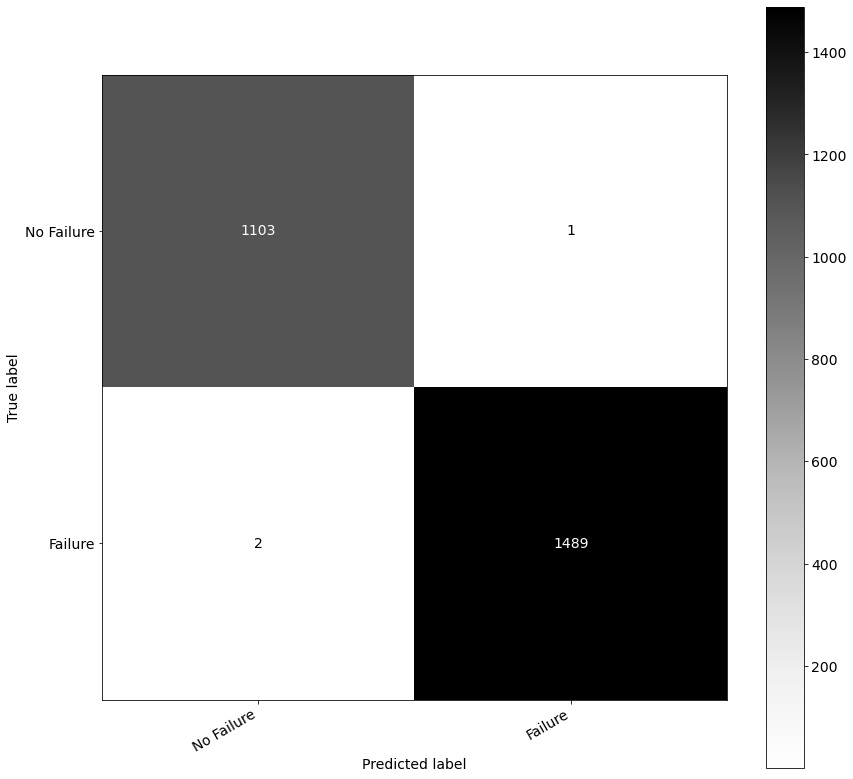

In [25]:
# Confusion Matrix
confusion_machine_status(split[5],y_pred_test,)
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/randomforestmachinestatusEF.png')

Machine status classification is outstanding as in case of the previous two models. 

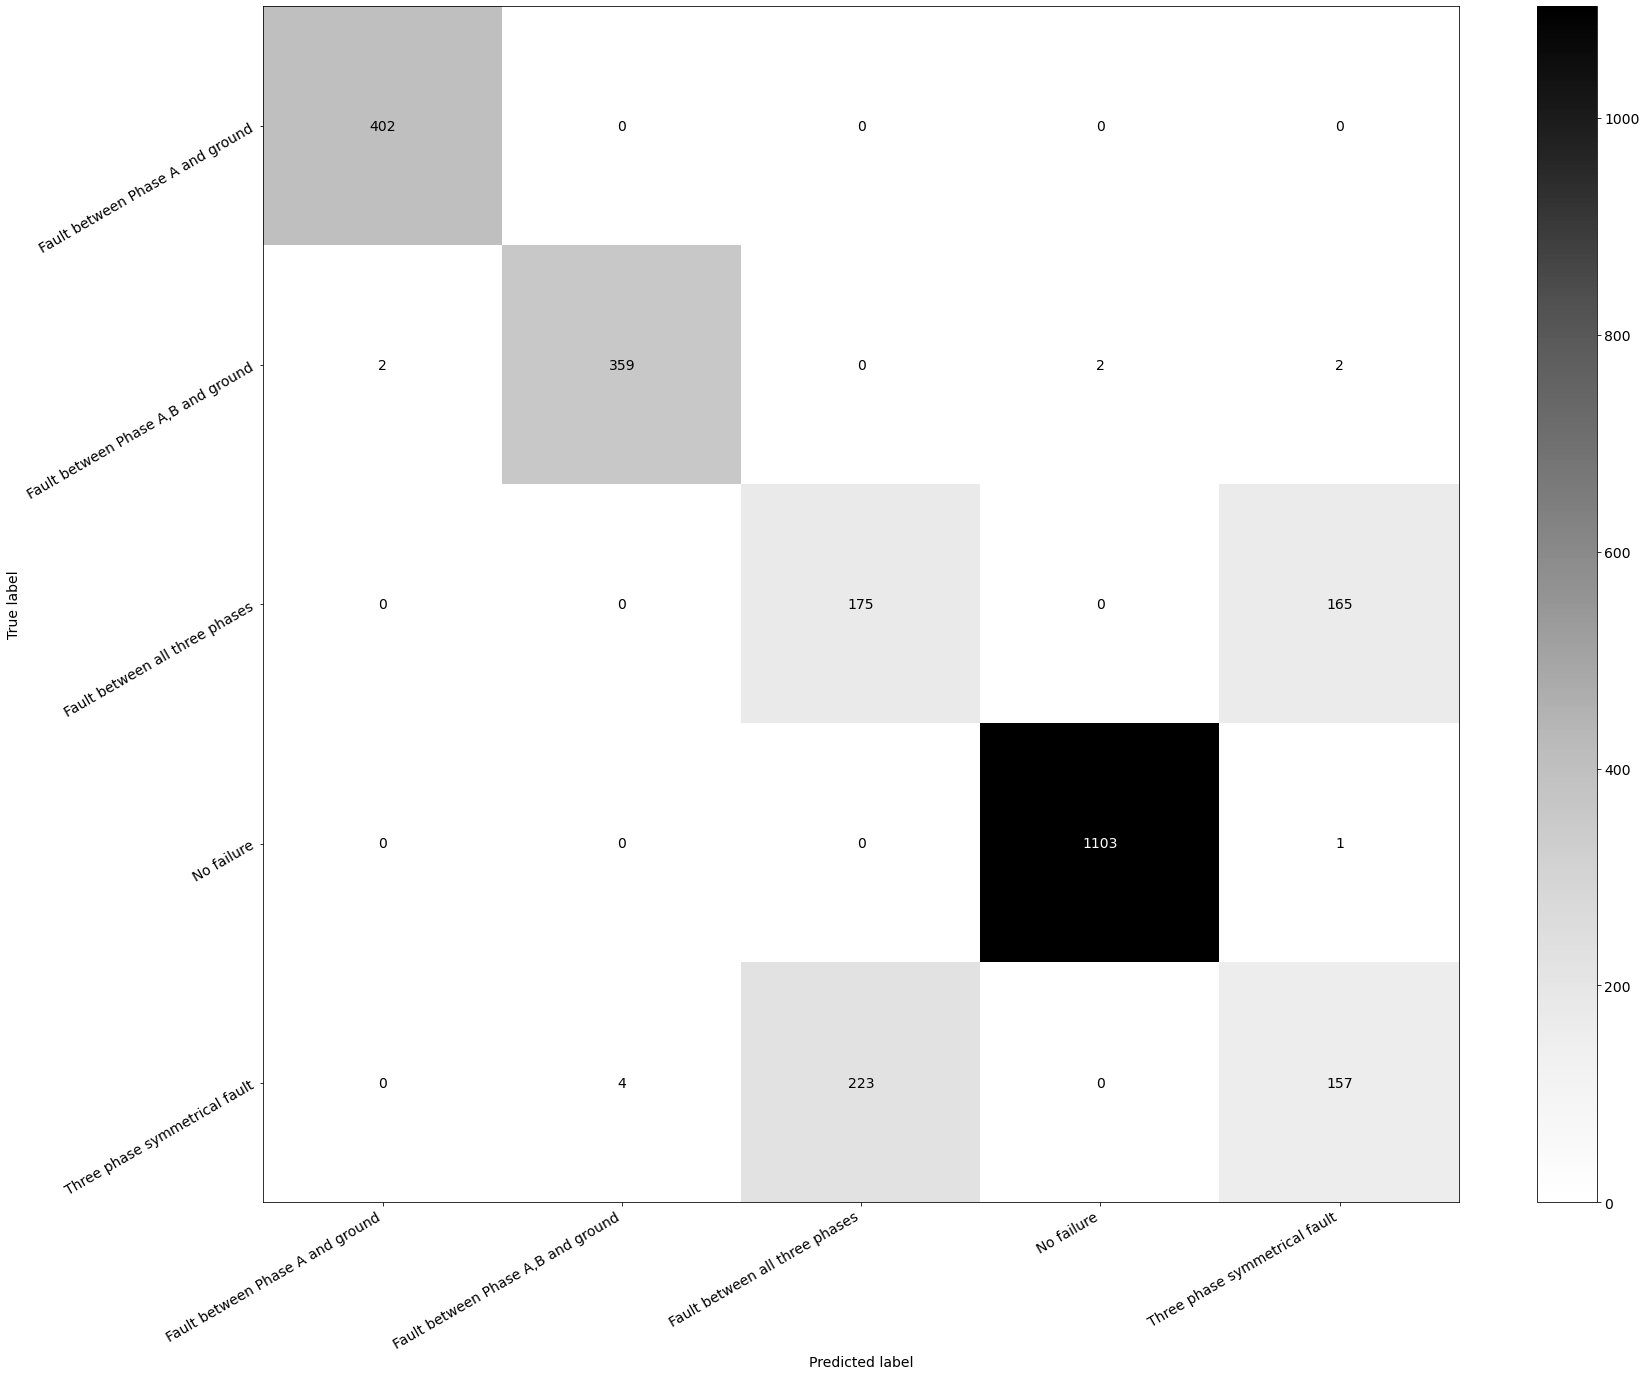

In [26]:
confusion_failure_type(split[5],y_pred_test,['Fault between Phase A and ground','Fault between Phase A,B and ground','Fault between all three phases','No failure','Three phase symmetrical fault'])
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/randomforestfailuretypeEF.png')

The main problem in the fault type classification regards again Three phase symmetrical fault and fault between all three phases. The majority of three phase symmetrical fault are classified as fault between all three phases. The application of Random forest combines each decision tree by computing the average of their probabilistic prediction: for each unit compute the average among trees of the probabilist prediction of belonging in each class and select the class with the highest average probabilistic prediction. By taking the average of the probabilistic predictions, some errors can cancel out. The model can achieve a reduction in variance by combining diverse trees, but at the cost of increasing the bias (bias-variance trade off), namely one class can be preferred such that Fault between all three phases in which the majority of units are classified. Alternatively as suggested in the original paper each decision tree vote for a single class: for a single unit each tree returns a class, the selected class for that unit will be the one with the highest absolute frequency among the trees. Notice this combination can leads to a reduction in bias at the cost of greater variance (bias variance trade-off)   

### MLP classifier

In [27]:
# neural network
params_mlp=grid_nn_ef(split[2],split[4],'micro')

|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... |  layers   | max_iter  | momentum  | neurons1  | neurons2  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7424   |  2.443    |  0.001699 |  64.84    |  1.531    |  0.883    |  1.297    |  8.022e+0 |  0.4202   |  8.148    |  5.688    |  2.962    |  0.2353   |
|  2        |  0.2      |  0.324    |  0.006699 |  85.58    |  0.5458   |  1.394    |  1.236    |  8.074e+0 |  0.9008   |  13.15    |  8.203    |  2.437    |  0.981    |
|  3        |  0.2      |  2.303    |  0.00814  |  63.19    |  0.05462  |  1.358    |  1.21     |  8.817e+0 |  0.6977   |  11.09    |  5.371    |  2.985    |  0.1367   |
|  4        |  0.7919   |  2.456    |  0.004856 |  61.36    |  1.448    |  0.9652   |  1.797    |  8.319e+0 |  0.9472   |  14.27    |  8.069    |  0.1

From the bayes optimization the layer sizes are: (6,10,6) for the failure type classification and (6,10,1) for the machine status classification. The relu activation function is used for the hidden layers, while the weights are computed using lbfgs (Quasi Newton Approximation).

In [28]:
classifier = MLPClassifier(random_state=123,**params_mlp)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2], split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [29]:
# Performance Metrics micro
print(performance_failure_type(split[5],y_pred_test,'micro'))

Test Precision (Failure Type)      :  94.49 %
Test Recall (Failure Type)         :  94.49 %
Test F1-Score (Failure Type) :  94.49 %
Test Balanced Accuracy Score (Failure Type): 92.44 %
()


In [30]:
# Performance Metrics macro
print(performance_failure_type(split[5],y_pred_test,'macro'))

Test Precision (Failure Type)      :  93.24 %
Test Recall (Failure Type)         :  92.44 %
Test F1-Score (Failure Type) :  92.78 %
Test Balanced Accuracy Score (Failure Type): 92.44 %
()


In [31]:
# Performance Metrics Machine Status
print(performance_machine_status(split[5],y_pred_test))

Test Precision (Machine Status)      :  99.93 %
Test Recall (Machine Status)         :  99.46 %
Test F1-score (Machine Status) :  99.7 %
()


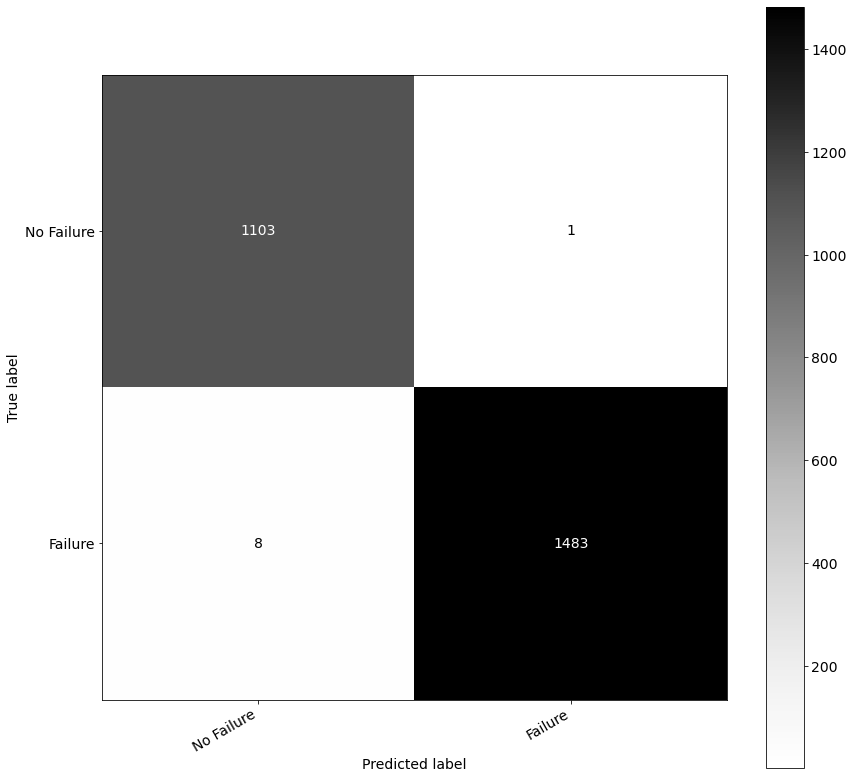

In [32]:
# Confusion Matrix
confusion_machine_status(split[5],y_pred_test,)
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/nnmachinestatusEF.png')

The machine status classification works well as in the machine learning models.

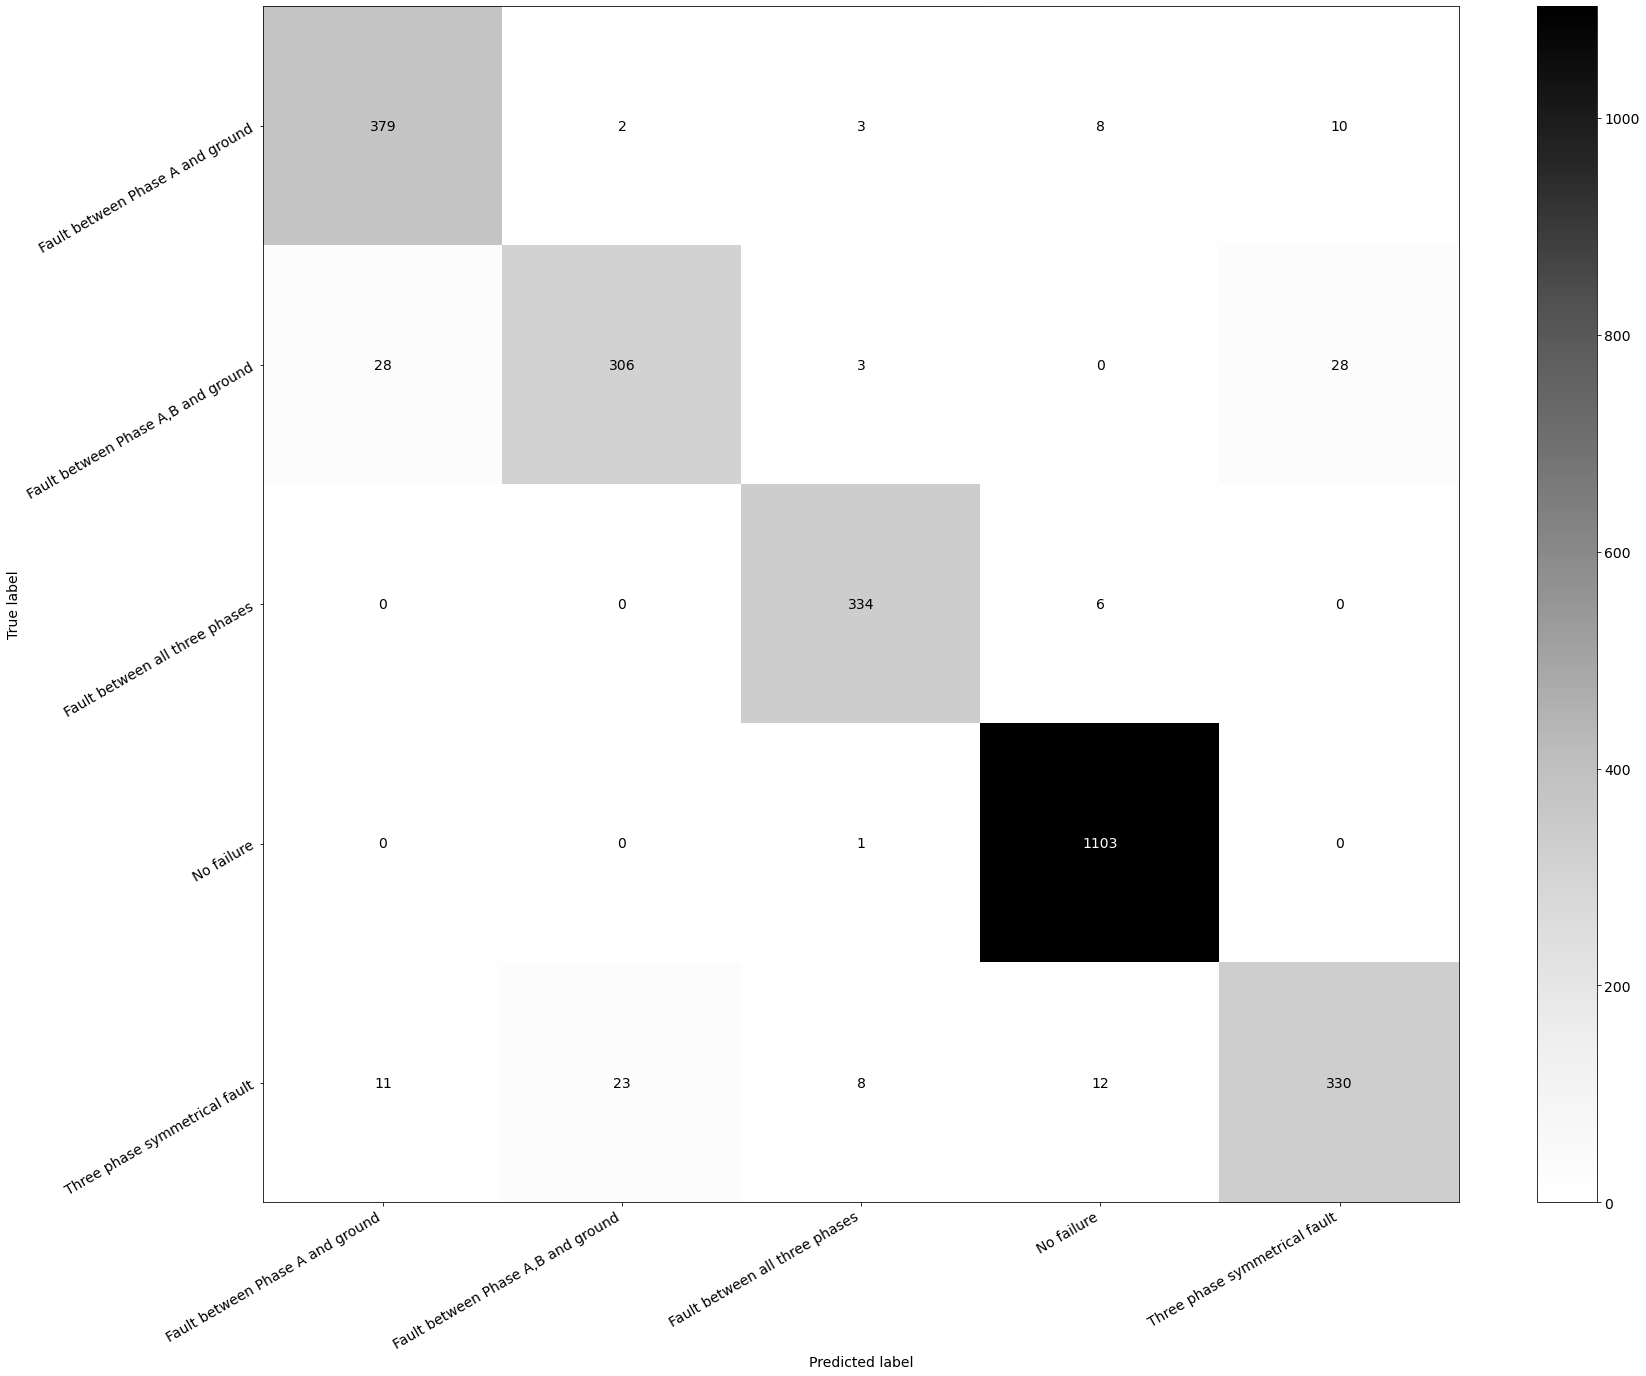

In [33]:
confusion_failure_type(split[5],y_pred_test,['Fault between Phase A and ground','Fault between Phase A,B and ground','Fault between all three phases','No failure','Three phase symmetrical fault'])
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/nnfailuretypeEF.png')

The overall performance of the type of failure classification of the MLP classifier outstands the other machine learning models. Fault between all three phases is fully detected, while the "worst" classification performance is in Three phase symmetrical fault.   

### Outlooks
- MLP classifier works better than machine learning models in the type of failure classification. It better distinguish between fault between all three phases and three phase symmetrical fault. 
- All models works well in the machine status classification, despite the model hyperparameter are tuned dealing with imbalanced problem the classification task becomes easier when switching from imbalanced to balanced classification.
- lbfgs solver perform well with small dataset such as the ones used here. 